<a href="https://colab.research.google.com/github/vatikajuniar/Cosmestuff/blob/main/Klasifikasi_Kesehatan_Janin_Berbasis_Data_CTG_dengan_Algoritma_K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model and Preprocessing
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, mean_absolute_error

# Data Loading

In [27]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/fetal-health-classification")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/fetal-health-classification/versions/1


In [28]:
df = pd.read_csv(path + "/fetal_health.csv")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

# Exploratory Data Analytic (EDA)

In [30]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [32]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [33]:
# Handling Missing Data
print(f"Jumlah data kosong: {df.isna().sum().sum()}")

Jumlah data kosong: 0


In [34]:
# Handling Duplicate Data
print(f"Jumlah data duplicated: {df.duplicated().sum()}")

Jumlah data duplicated: 13


In [35]:
# Menghapus baris duplikat
df = df.drop_duplicates()

# Memastikan tidak ada lagi data duplikat
print(f"Jumlah data duplicated setelah penghapusan: {df.duplicated().sum()}")

Jumlah data duplicated setelah penghapusan: 0


<ipython-input-36-dfb5fbed7eb1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fetal_health', data=df, palette='viridis')


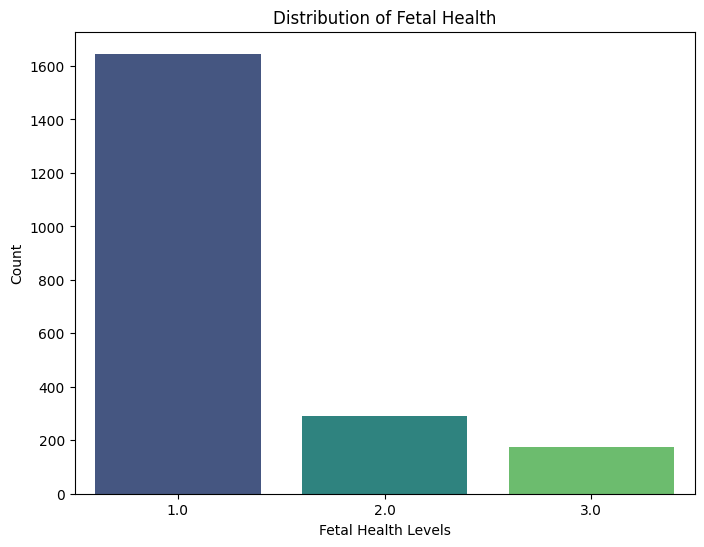

In [36]:
# Visualisasi Distribusi Variabel Target
plt.figure(figsize=(8, 6))
sns.countplot(x='fetal_health', data=df, palette='viridis')
plt.title("Distribution of Fetal Health")
plt.xlabel("Fetal Health Levels")
plt.ylabel("Count")
plt.show()

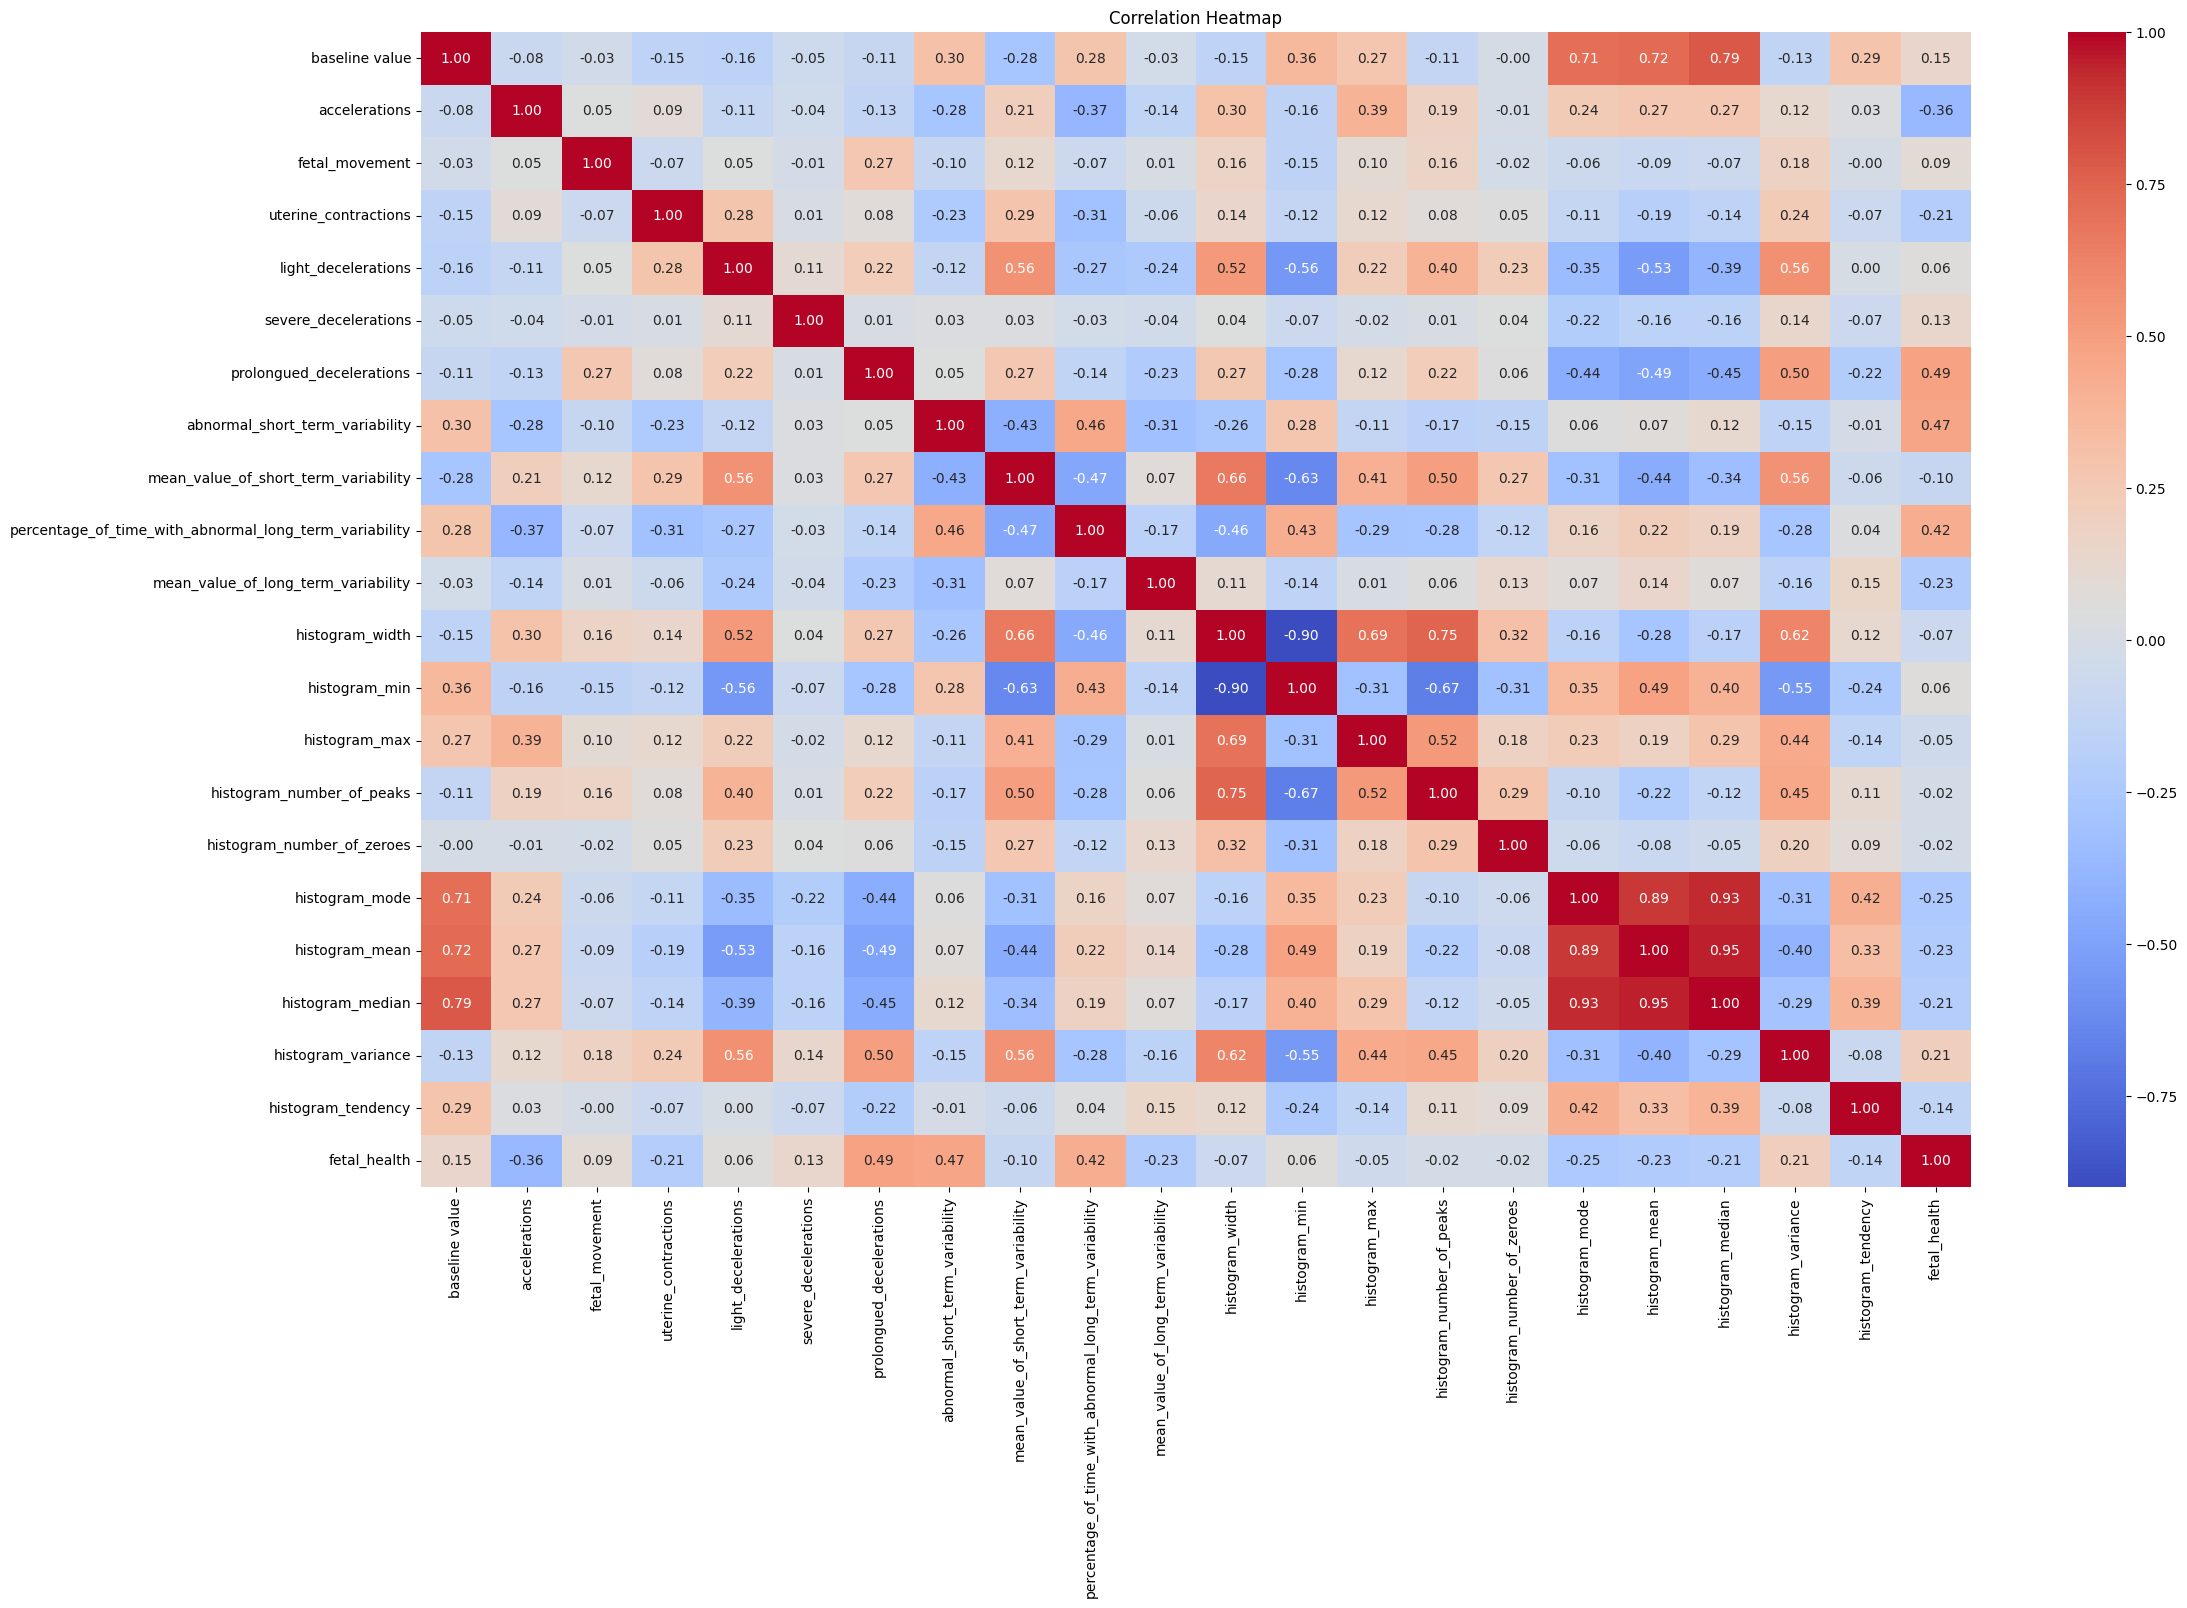

In [37]:
# Correlation Heatmap
plt.figure(figsize=(25, 15))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

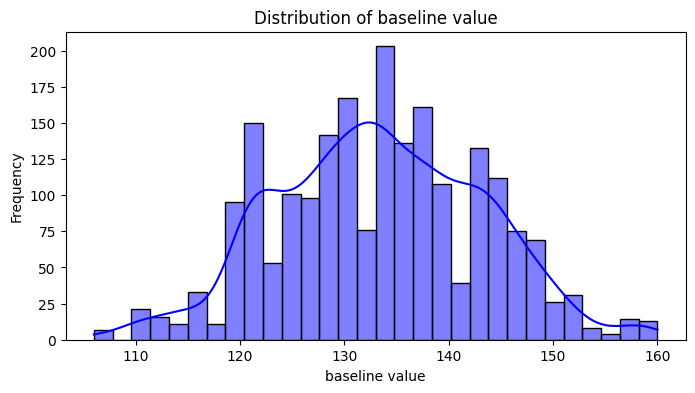

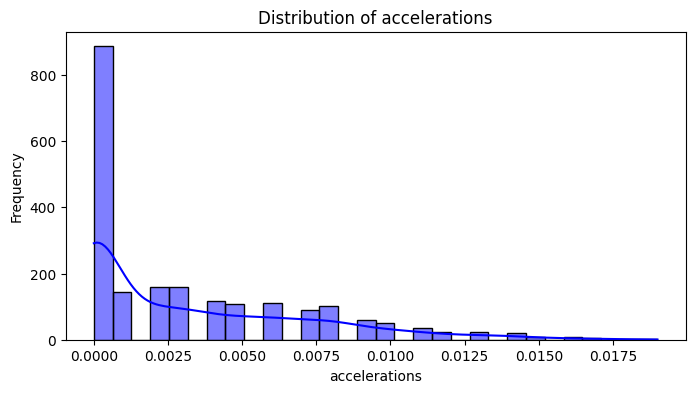

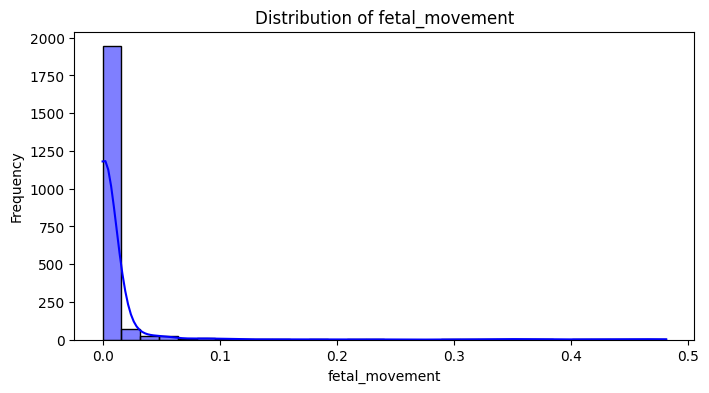

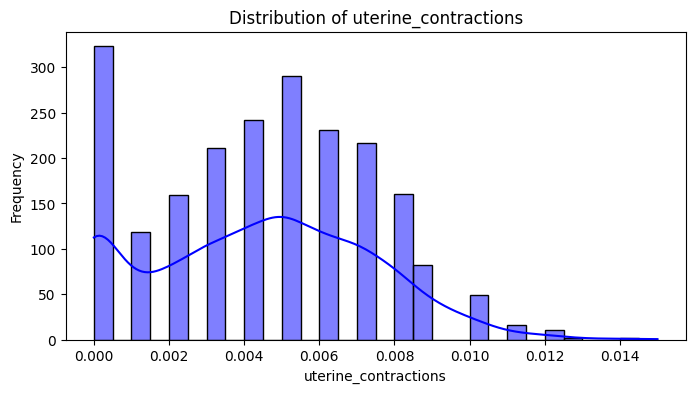

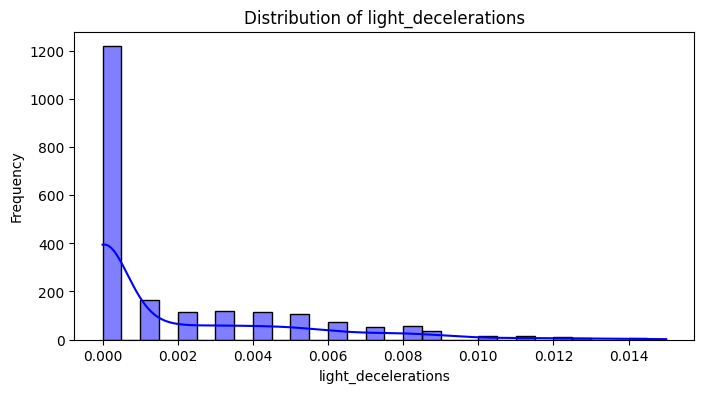

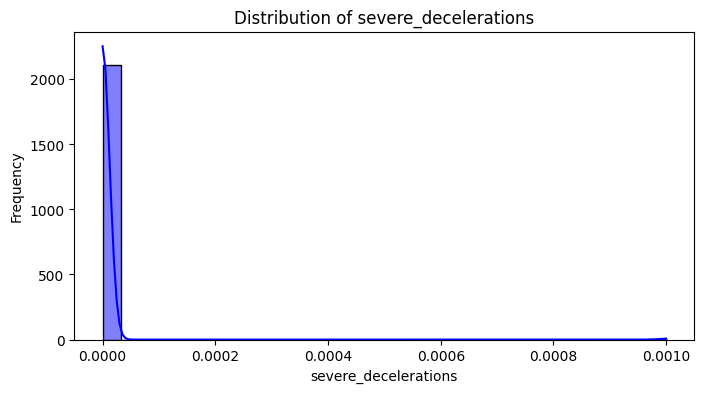

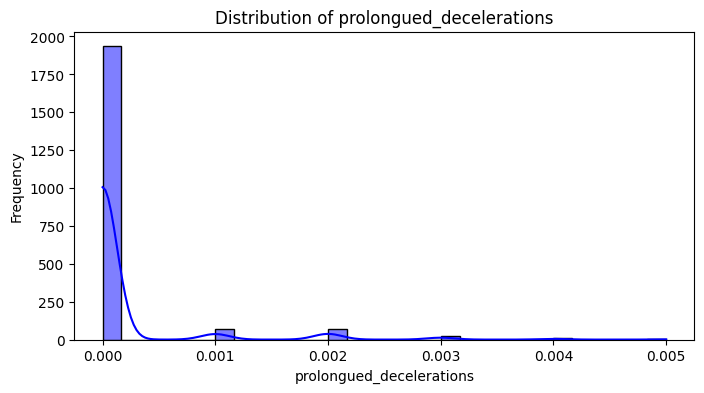

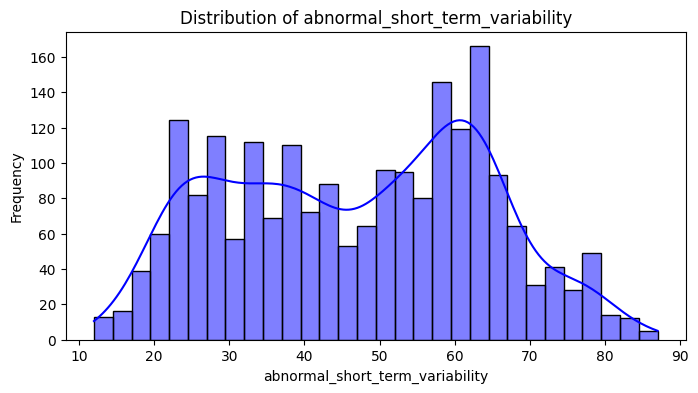

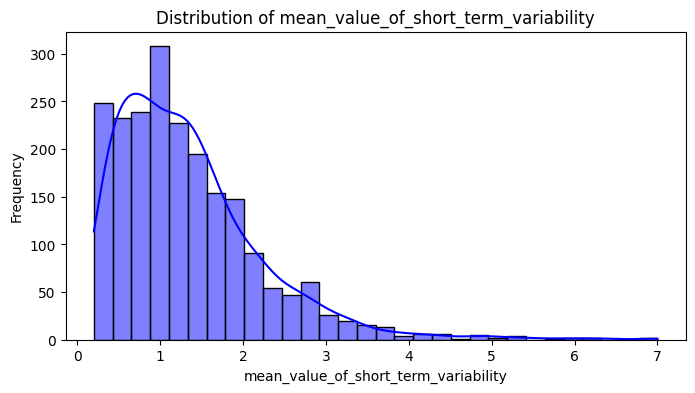

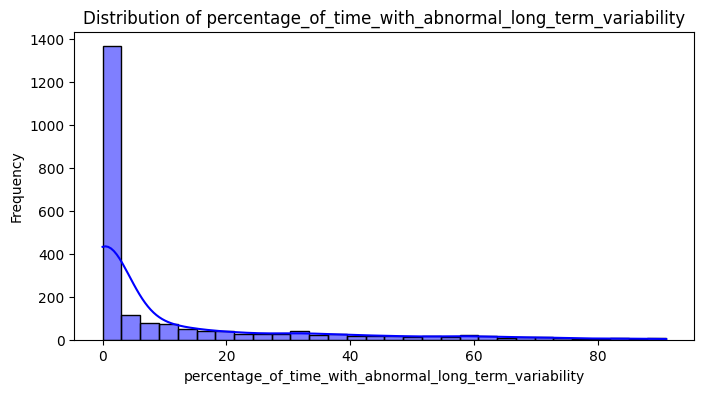

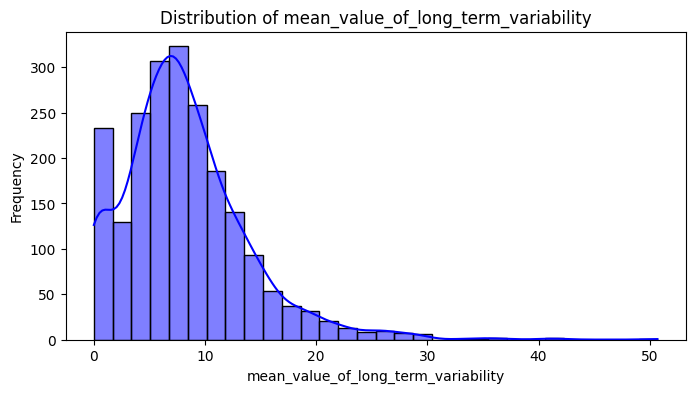

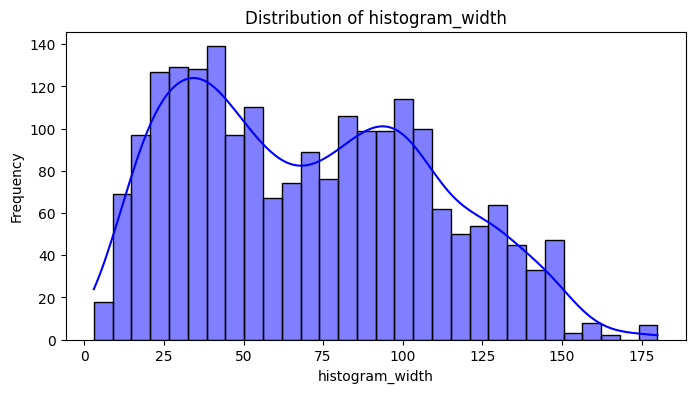

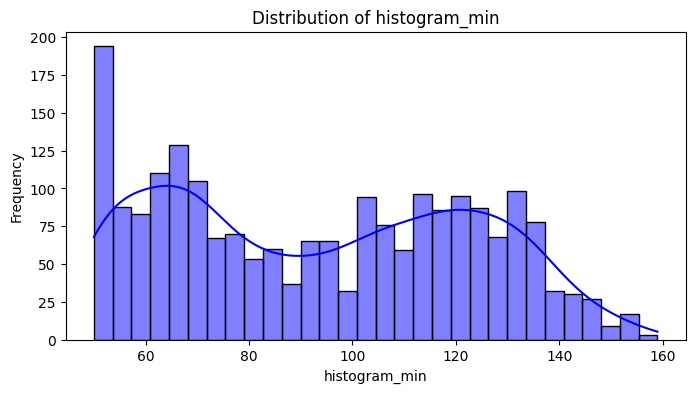

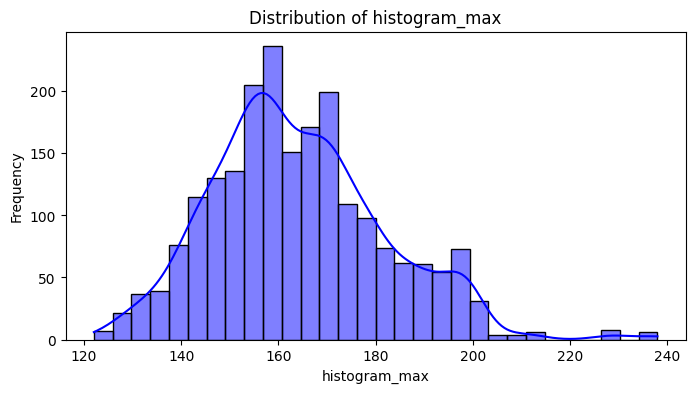

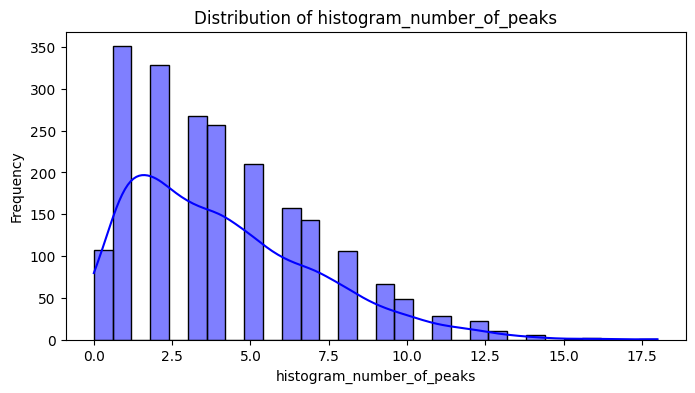

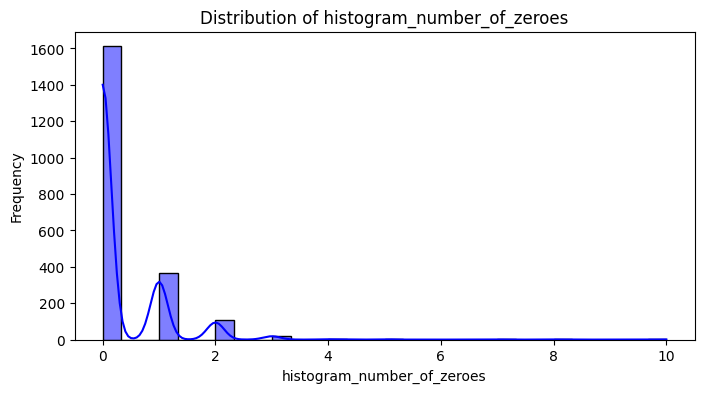

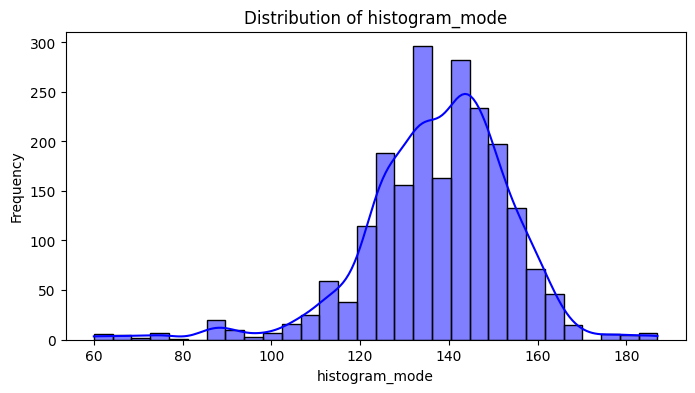

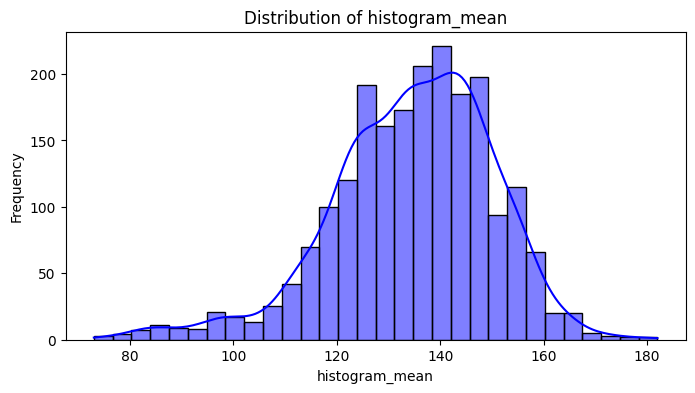

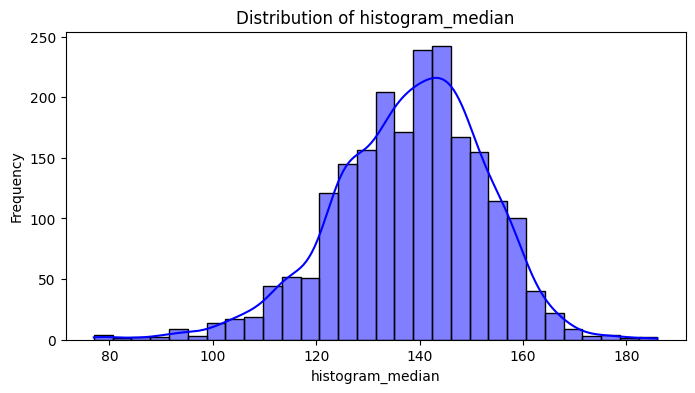

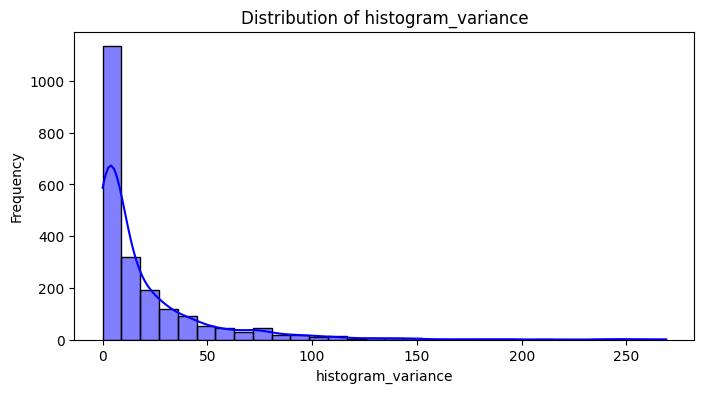

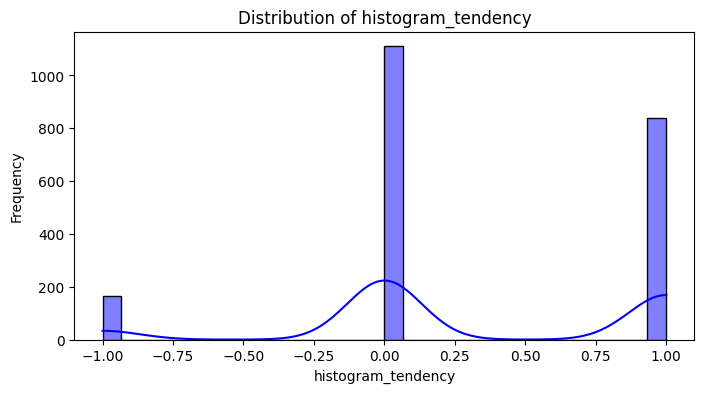

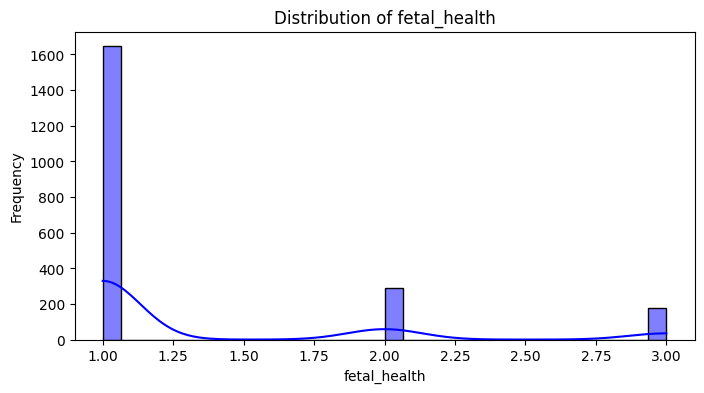

In [38]:
# Feature Distributions
numeric_features = df.select_dtypes(include=['number']).columns
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


Outliers per Column:
 baseline value                                              0
accelerations                                              14
fetal_movement                                            305
uterine_contractions                                        1
light_decelerations                                       150
severe_decelerations                                        7
prolongued_decelerations                                  178
abnormal_short_term_variability                             0
mean_value_of_short_term_variability                       70
percentage_of_time_with_abnormal_long_term_variability    305
mean_value_of_long_term_variability                        71
histogram_width                                             0
histogram_min                                               0
histogram_max                                              24
histogram_number_of_peaks                                  19
histogram_number_of_zeroes                     

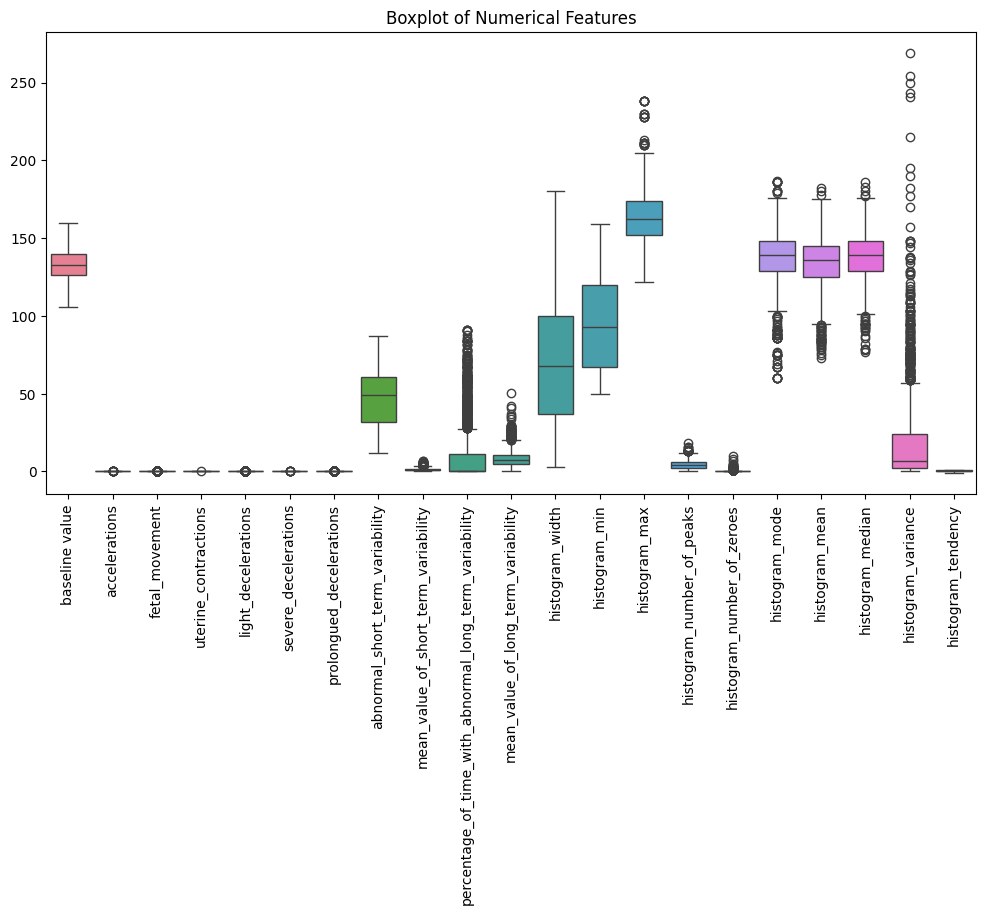

In [39]:
# Check for Outliers
columns_with_outliers = []

numeric_columns = df.select_dtypes(include=['number'])
numeric_columns = numeric_columns.drop('fetal_health', axis=1)
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers per Column:\n", outliers)

if outliers.any():
    columns_with_outliers = outliers[outliers > 0].index
    print("\nColumns with Outliers:", columns_with_outliers)

# Boxplot to Visualize Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data= df[numeric_columns.columns]) # Use numeric_columns.columns to get column names
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Preprocessing

Mengangani outlier

In [40]:
# Mengganti outlier menggunakan metode IQR
for col in columns_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers dengan .loc
    df.loc[df[col] > upper_bound, col] = upper_bound
    df.loc[df[col] < lower_bound, col] = lower_bound

# Mengecek ulang jumlah outlier setelah penanganan
print("Outliers per Column After Handling:")
for col in columns_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f" {col:50} {outliers_count}")

Outliers per Column After Handling:
 accelerations                                      0
 fetal_movement                                     0
 uterine_contractions                               0
 light_decelerations                                0
 severe_decelerations                               0
 prolongued_decelerations                           0
 mean_value_of_short_term_variability               0
 percentage_of_time_with_abnormal_long_term_variability 0
 mean_value_of_long_term_variability                0
 histogram_max                                      0
 histogram_number_of_peaks                          0
 histogram_number_of_zeroes                         0
 histogram_mode                                     0
 histogram_mean                                     0
 histogram_median                                   0
 histogram_variance                                 0


In [54]:
selector = SelectKBest(score_func=f_classif, k=10)  # Memilih 10 fitur terbaik
X_selected = selector.fit_transform(X, y)

# Menampilkan fitur yang dipilih
selected_features = X.columns[selector.get_support()]

# Train-Test Split menggunakan fitur terpilih
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Modeling dan Evaluasi
# Melatih model menggunakan fitur terpilih
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_selected, y_train)

# Evaluasi dengan fitur terpilih
y_pred_selected = knn_model.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print("Fitur terpilih:")
for feature in selected_features:
    print(f" - {feature}")

print(f"\nAkurasi dengan fitur terpilih: {accuracy_selected:.2f}")

Fitur terpilih:
 - baseline value
 - accelerations
 - uterine_contractions
 - abnormal_short_term_variability
 - mean_value_of_short_term_variability
 - percentage_of_time_with_abnormal_long_term_variability
 - histogram_mode
 - histogram_mean
 - histogram_median
 - histogram_variance

Akurasi dengan fitur terpilih: 0.93


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 5  6 15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


# TRAIN-TEST SPLIT

In [42]:
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['fetal_health'])
y = df['fetal_health']

# Membagi data menjadi train dan test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran train dan test set
print(f"Jumlah data pada train set: {X_train.shape[0]}")
print(f"Jumlah data pada test set: {X_test.shape[0]}")

Jumlah data pada train set: 1690
Jumlah data pada test set: 423


# Melatih Model

In [43]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
print("KNN accuracy: {:.2f}".format(knn_model.score(X_test, y_test)))

KNN accuracy: 0.92


In [45]:
# Inisialisasi model (tanpa 'use_label_encoder')
from sklearn.neighbors import KNeighborsClassifier # Import the correct class
model = KNeighborsClassifier( # Use the correct class name
    n_neighbors=5,  # Add the number of neighbors
    # eval_metric='logloss',  # Removed because it's not a parameter for KNeighborsClassifier
    # random_state=42  # Removed because the random_state should be in the KFold
)

# Inisialisasi KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Placeholder untuk menyimpan skor
cv_scores = []

# Loop melalui setiap fold
for train_index, val_index in kf.split(X_train):
    # Bagi data menjadi training dan validation set
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Latih model pada training fold
    model.fit(X_train_fold, y_train_fold)

    # Prediksi pada validation fold
    y_pred = model.predict(X_val_fold)

    # Hitung akurasi dan simpan skor
    score = accuracy_score(y_val_fold, y_pred)
    cv_scores.append(score)

# Output hasil cross-validation
print(f"Cross-Validation Scores: {[f'{score:.2f}' for score in cv_scores]}")  # Format each score individually
print(f"Mean CV Score: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation CV Score: {np.std(cv_scores):.2f}")

Cross-Validation Scores: ['0.89', '0.88', '0.87', '0.86', '0.88']
Mean CV Score: 0.87
Standard Deviation CV Score: 0.01


# Hyperparameter Tuning

In [46]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print(f"Best CV Accuracy: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best CV Accuracy: 0.90


# Evaluasi Model

In [47]:
# Evaluate Best Model
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.93


In [48]:
train_accuracy = grid_search.best_estimator_.score(X_train, y_train)
train_accuracy

0.9988165680473373

In [49]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.08037825059101655

Confusion Matrix

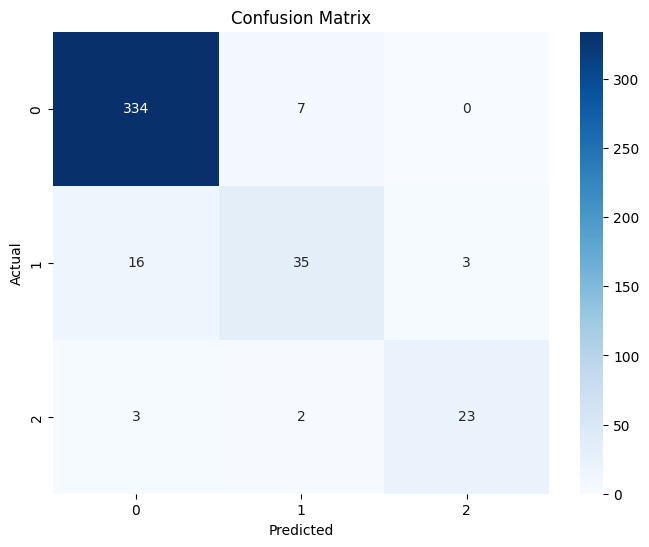

In [50]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()